In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import plot_model


In [13]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [14]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer with 10 classes
model.add(layers.Dense(10, activation='softmax'))


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8970 - loss: 0.3209 - val_accuracy: 0.9852 - val_loss: 0.0475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0465 - val_accuracy: 0.9875 - val_loss: 0.0370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0325 - val_accuracy: 0.9915 - val_loss: 0.0272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.9906 - val_loss: 0.0295
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9939 - loss: 0.0181 - val_accuracy: 0.9895 - val_loss: 0.0344


In [17]:
# Print a summary of the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [ ]:
# Visualize the model architecture and save it to a file
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.9895 - loss: 0.0344
Test accuracy: 0.9894999861717224


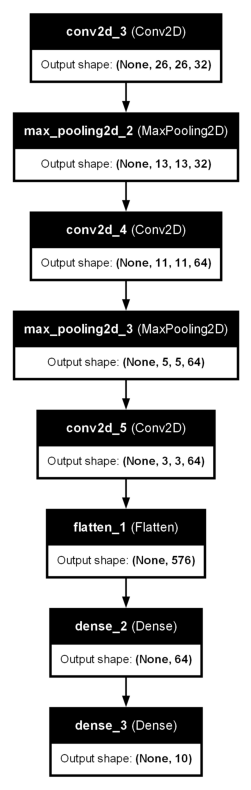

In [22]:
# Display the model architecture image
img = plt.imread('cnn_model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


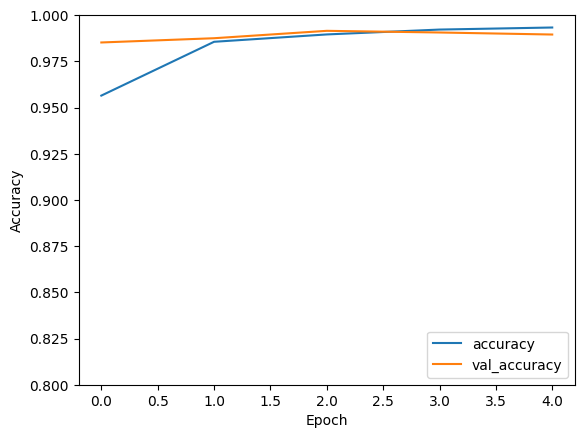

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()


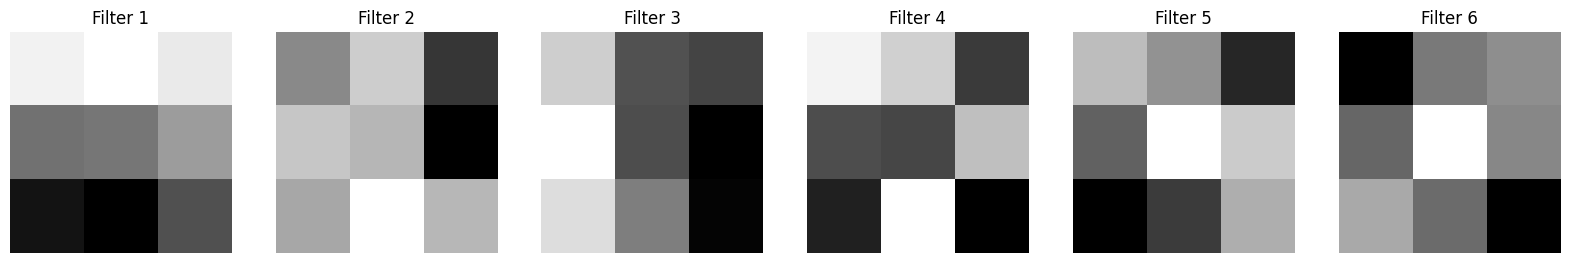

In [23]:
import numpy as np

# Get the weights of the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize the filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 6 filters
n_filters = 6
fig, axs = plt.subplots(1, n_filters, figsize=(20, 8))

for i in range(n_filters):
    ax = axs[i]
    # Extract the ith filter
    f = filters[:, :, :, i]
    # Since the filters are for grayscale images, they have only one channel
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i + 1}')

plt.show()


In [24]:
# Create a model to extract the outputs of each Conv2D layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Choose an image to pass through the network
img = test_images[0]  # Take the first test image

# Add batch dimension to the image
img = np.expand_dims(img, axis=0)

# Get the feature maps
activations = activation_model.predict(img)

# Plot the feature maps of the first Conv2D layer
first_layer_activation = activations[0]

n_features = first_layer_activation.shape[-1]  # Number of features
size = first_layer_activation.shape[1]  # Size of the feature map

n_cols = 6  # Number of columns in the plot grid
n_rows = n_features // n_cols  # Number of rows in the plot grid

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i in range(n_features):
    ax = axs[i // n_cols, i % n_cols]
    ax.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'Feature {i + 1}')

plt.show()


ValueError: The layer sequential_1 has never been called and thus has no defined input.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8900 - loss: 0.3409 - val_accuracy: 0.9864 - val_loss: 0.0460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0455 - val_accuracy: 0.9882 - val_loss: 0.0392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0332 - val_accuracy: 0.9882 - val_loss: 0.0351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9909 - val_loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9908 - val_loss: 0.0298


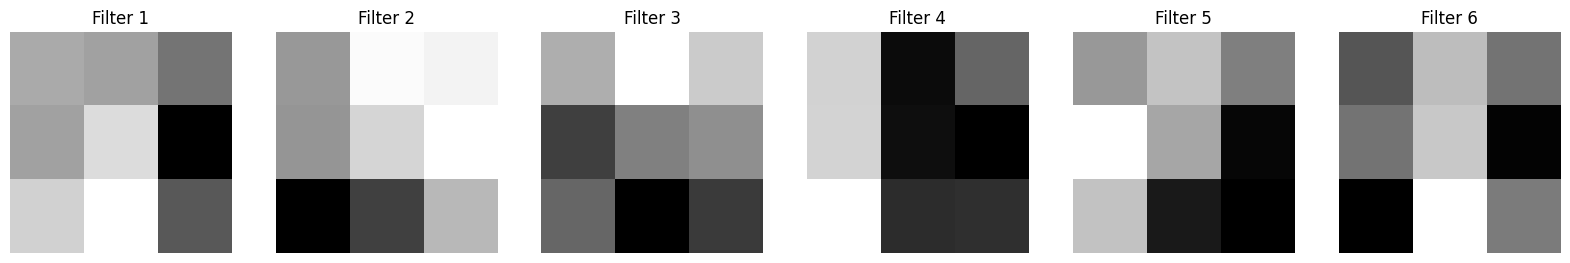

ValueError: The layer sequential_3 has never been called and thus has no defined input.

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Visualize the kernels in the first Conv2D layer
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6
fig, axs = plt.subplots(1, n_filters, figsize=(20, 8))

for i in range(n_filters):
    ax = axs[i]
    f = filters[:, :, :, i]
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i + 1}')

plt.show()

# Visualize the output feature maps of the first Conv2D layer
def visualize_feature_maps(model, layer_name, image):
    # Create a model that will return the outputs of the intermediate layer
    intermediate_model = models.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
    # Make predictions
    feature_maps = intermediate_model.predict(np.expand_dims(image, axis=0))
    
    # Number of feature maps
    n_features = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    
    # Plot the feature maps
    n_cols = 6
    n_rows = n_features // n_cols
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    for i in range(n_features):
        ax = axs[i // n_cols, i % n_cols]
        ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
        ax.axis('off')
        ax.set_title(f'Feature {i + 1}')
    
    plt.show()

# Choose an image to pass through the network
img = test_images[0]  # Take the first test image

# Visualize feature maps from the first Conv2D layer
visualize_feature_maps(model, 'conv2d', img)  # 'conv2d' is the name of the first Conv2D layer
